In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# History

In [2]:
history = pd.read_parquet("/Users/qiangzhang/Downloads/ebnerd_large/train/history.parquet")
display(history.head(10))

,user_id,impression_time_fixed,scroll_percentage_fixed,article_id_fixed,read_time_fixed
0,10029,"[2023-04-28T06:16:57.000000, 2023-04-28T06:17:...","[23.0, 69.0, 27.0, nan, 47.0, 38.0, 100.0, 12....","[9735579, 9739888, 9739471, 9739864, 9738441, ...","[28.0, 24.0, 11.0, 107.0, 8.0, 7.0, 20.0, 5.0,..."
1,10033,"[2023-04-27T11:11:32.000000, 2023-04-27T11:12:...","[33.0, 41.0, 33.0, 100.0, 68.0, 38.0, 1.0, 58....","[9738139, 9738263, 9738139, 9738760, 9738777, ...","[2.0, 2.0, 718.0, 18.0, 26.0, 78.0, 3.0, 11.0,..."
2,10034,"[2023-04-30T09:46:57.000000, 2023-04-30T09:47:...","[nan, 88.0, 27.0, nan, 23.0, 100.0, 100.0, 22....","[9742693, 9742686, 9744016, 9743818, 9744922, ...","[21.0, 103.0, 28.0, 0.0, 5.0, 34.0, 14.0, 14.0..."
3,10041,"[2023-04-27T15:15:28.000000, 2023-04-27T15:16:...","[78.0, 41.0, 4.0, 16.0, 22.0, 32.0, 11.0, 94.0...","[9739035, 9738303, 9737243, 9739634, 9739802, ...","[12.0, 11.0, 3.0, 3.0, 4.0, 13.0, 29.0, 24.0, ..."
4,10103,"[2023-04-27T15:37:35.000000, 2023-04-27T15:38:...","[100.0, nan, 100.0, 100.0, 100.0, 28.0, 82.0, ...","[9739035, 9739164, 9741803, 9740087, 9741986, ...","[45.0, 8.0, 61.0, 72.0, 56.0, 3.0, 22.0, 16.0,..."
5,10142,"[2023-04-27T09:54:43.000000, 2023-04-27T09:55:...","[93.0, 50.0, nan, 26.0, 61.0, 52.0, 100.0, 85....","[9738569, 9738528, 9738364, 9736689, 9737266, ...","[20.0, 4.0, 6.0, 7.0, 5.0, 28.0, 17.0, 86.0, 1..."
6,10185,"[2023-04-27T07:41:32.000000, 2023-04-27T07:42:...","[100.0, 100.0, 17.0, 100.0, 100.0, 100.0, 12.0...","[9738334, 9738292, 9737535, 9738292, 9737881, ...","[35.0, 75.0, 5.0, 3.0, 10.0, 89.0, 694.0, 34.0..."
7,10199,"[2023-04-27T07:35:12.000000, 2023-04-27T07:35:...","[43.0, 100.0, 90.0, 100.0, 36.0, 100.0, 100.0,...","[9738216, 9738334, 9737881, 9738334, 9738292, ...","[3.0, 27.0, 38.0, 6.0, 13.0, 64.0, 61.0, 6.0, ..."
8,10202,"[2023-04-27T13:55:11.000000, 2023-04-27T13:55:...","[21.0, 55.0, 62.0, 32.0, 22.0, 30.0, 64.0, 96....","[9738303, 9738993, 9738968, 9735495, 9735495, ...","[5.0, 3.0, 7.0, 4.0, 1.0, 2.0, 4.0, 2.0, 2.0, ..."
9,10220,"[2023-04-27T20:46:37.000000, 2023-04-27T20:46:...","[36.0, 35.0, 80.0, nan, 65.0, 31.0, 43.0, 41.0...","[9739443, 9739411, 9739452, 9739398, 9739342, ...","[2.0, 6.0, 2.0, 20.0, 26.0, 2.0, 9.0, 5.0, 5.0..."


In [7]:
# stats on history length
history["article_id_length"] = history["article_id_fixed"].transform(lambda x: len(x))
display(history.head(10))
history_length = history.groupby(['user_id']).sum()

,user_id,impression_time_fixed,scroll_percentage_fixed,article_id_fixed,read_time_fixed,article_id_length
0,10029,"[2023-04-28T06:16:57.000000, 2023-04-28T06:17:...","[23.0, 69.0, 27.0, nan, 47.0, 38.0, 100.0, 12....","[9735579, 9739888, 9739471, 9739864, 9738441, ...","[28.0, 24.0, 11.0, 107.0, 8.0, 7.0, 20.0, 5.0,...",678
1,10033,"[2023-04-27T11:11:32.000000, 2023-04-27T11:12:...","[33.0, 41.0, 33.0, 100.0, 68.0, 38.0, 1.0, 58....","[9738139, 9738263, 9738139, 9738760, 9738777, ...","[2.0, 2.0, 718.0, 18.0, 26.0, 78.0, 3.0, 11.0,...",587
2,10034,"[2023-04-30T09:46:57.000000, 2023-04-30T09:47:...","[nan, 88.0, 27.0, nan, 23.0, 100.0, 100.0, 22....","[9742693, 9742686, 9744016, 9743818, 9744922, ...","[21.0, 103.0, 28.0, 0.0, 5.0, 34.0, 14.0, 14.0...",140
3,10041,"[2023-04-27T15:15:28.000000, 2023-04-27T15:16:...","[78.0, 41.0, 4.0, 16.0, 22.0, 32.0, 11.0, 94.0...","[9739035, 9738303, 9737243, 9739634, 9739802, ...","[12.0, 11.0, 3.0, 3.0, 4.0, 13.0, 29.0, 24.0, ...",139
4,10103,"[2023-04-27T15:37:35.000000, 2023-04-27T15:38:...","[100.0, nan, 100.0, 100.0, 100.0, 28.0, 82.0, ...","[9739035, 9739164, 9741803, 9740087, 9741986, ...","[45.0, 8.0, 61.0, 72.0, 56.0, 3.0, 22.0, 16.0,...",64
5,10142,"[2023-04-27T09:54:43.000000, 2023-04-27T09:55:...","[93.0, 50.0, nan, 26.0, 61.0, 52.0, 100.0, 85....","[9738569, 9738528, 9738364, 9736689, 9737266, ...","[20.0, 4.0, 6.0, 7.0, 5.0, 28.0, 17.0, 86.0, 1...",412
6,10185,"[2023-04-27T07:41:32.000000, 2023-04-27T07:42:...","[100.0, 100.0, 17.0, 100.0, 100.0, 100.0, 12.0...","[9738334, 9738292, 9737535, 9738292, 9737881, ...","[35.0, 75.0, 5.0, 3.0, 10.0, 89.0, 694.0, 34.0...",701
7,10199,"[2023-04-27T07:35:12.000000, 2023-04-27T07:35:...","[43.0, 100.0, 90.0, 100.0, 36.0, 100.0, 100.0,...","[9738216, 9738334, 9737881, 9738334, 9738292, ...","[3.0, 27.0, 38.0, 6.0, 13.0, 64.0, 61.0, 6.0, ...",266
8,10202,"[2023-04-27T13:55:11.000000, 2023-04-27T13:55:...","[21.0, 55.0, 62.0, 32.0, 22.0, 30.0, 64.0, 96....","[9738303, 9738993, 9738968, 9735495, 9735495, ...","[5.0, 3.0, 7.0, 4.0, 1.0, 2.0, 4.0, 2.0, 2.0, ...",306
9,10220,"[2023-04-27T20:46:37.000000, 2023-04-27T20:46:...","[36.0, 35.0, 80.0, nan, 65.0, 31.0, 43.0, 41.0...","[9739443, 9739411, 9739452, 9739398, 9739342, ...","[2.0, 6.0, 2.0, 20.0, 26.0, 2.0, 9.0, 5.0, 5.0...",60


Text(0, 0.5, '# users')

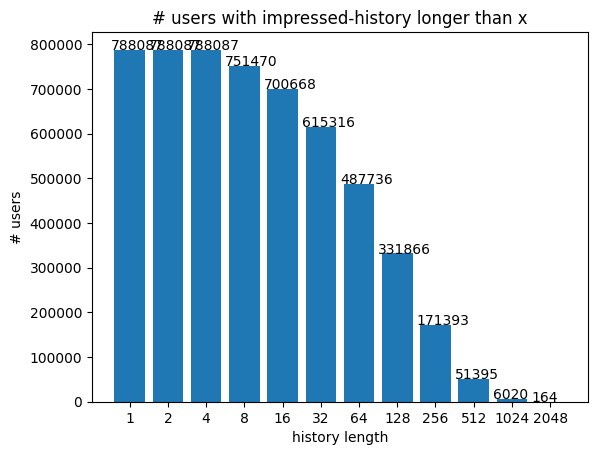

In [19]:
# create histogram of history length
bins = [2 ** i for i in range(13)]
x, _ = np.histogram(behavior_length["article_id_length"], bins)
x = x[::-1]
x = np.cumsum(x)
bins = bins[::-1]
plt.bar(x=range(len(x)), height=x[::-1])
plt.xticks(range(len(x)), bins[1:][::-1])
for xx, yy in zip(range(len(x)), x[::-1]):
    plt.annotate(str(yy), (xx - 0.5, yy))
plt.title("# users with impressed-history longer than x")
plt.xlabel("history length")
plt.ylabel("# users")

## Format Dataset for HLLM

In [3]:
# remap the user_id start from 0
history["user_id_fixed"] = history["user_id"].factorize(sort=True)[0] + 1
display(history.head(10))
print(history["user_id_fixed"].min(), history["user_id_fixed"].max(), len(history))

,user_id,impression_time_fixed,scroll_percentage_fixed,article_id_fixed,read_time_fixed,user_id_fixed
0,10029,"[2023-04-28T06:16:57.000000, 2023-04-28T06:17:...","[23.0, 69.0, 27.0, nan, 47.0, 38.0, 100.0, 12....","[9735579, 9739888, 9739471, 9739864, 9738441, ...","[28.0, 24.0, 11.0, 107.0, 8.0, 7.0, 20.0, 5.0,...",8
1,10033,"[2023-04-27T11:11:32.000000, 2023-04-27T11:12:...","[33.0, 41.0, 33.0, 100.0, 68.0, 38.0, 1.0, 58....","[9738139, 9738263, 9738139, 9738760, 9738777, ...","[2.0, 2.0, 718.0, 18.0, 26.0, 78.0, 3.0, 11.0,...",11
2,10034,"[2023-04-30T09:46:57.000000, 2023-04-30T09:47:...","[nan, 88.0, 27.0, nan, 23.0, 100.0, 100.0, 22....","[9742693, 9742686, 9744016, 9743818, 9744922, ...","[21.0, 103.0, 28.0, 0.0, 5.0, 34.0, 14.0, 14.0...",12
3,10041,"[2023-04-27T15:15:28.000000, 2023-04-27T15:16:...","[78.0, 41.0, 4.0, 16.0, 22.0, 32.0, 11.0, 94.0...","[9739035, 9738303, 9737243, 9739634, 9739802, ...","[12.0, 11.0, 3.0, 3.0, 4.0, 13.0, 29.0, 24.0, ...",16
4,10103,"[2023-04-27T15:37:35.000000, 2023-04-27T15:38:...","[100.0, nan, 100.0, 100.0, 100.0, 28.0, 82.0, ...","[9739035, 9739164, 9741803, 9740087, 9741986, ...","[45.0, 8.0, 61.0, 72.0, 56.0, 3.0, 22.0, 16.0,...",34
5,10142,"[2023-04-27T09:54:43.000000, 2023-04-27T09:55:...","[93.0, 50.0, nan, 26.0, 61.0, 52.0, 100.0, 85....","[9738569, 9738528, 9738364, 9736689, 9737266, ...","[20.0, 4.0, 6.0, 7.0, 5.0, 28.0, 17.0, 86.0, 1...",41
6,10185,"[2023-04-27T07:41:32.000000, 2023-04-27T07:42:...","[100.0, 100.0, 17.0, 100.0, 100.0, 100.0, 12.0...","[9738334, 9738292, 9737535, 9738292, 9737881, ...","[35.0, 75.0, 5.0, 3.0, 10.0, 89.0, 694.0, 34.0...",49
7,10199,"[2023-04-27T07:35:12.000000, 2023-04-27T07:35:...","[43.0, 100.0, 90.0, 100.0, 36.0, 100.0, 100.0,...","[9738216, 9738334, 9737881, 9738334, 9738292, ...","[3.0, 27.0, 38.0, 6.0, 13.0, 64.0, 61.0, 6.0, ...",53
8,10202,"[2023-04-27T13:55:11.000000, 2023-04-27T13:55:...","[21.0, 55.0, 62.0, 32.0, 22.0, 30.0, 64.0, 96....","[9738303, 9738993, 9738968, 9735495, 9735495, ...","[5.0, 3.0, 7.0, 4.0, 1.0, 2.0, 4.0, 2.0, 2.0, ...",56
9,10220,"[2023-04-27T20:46:37.000000, 2023-04-27T20:46:...","[36.0, 35.0, 80.0, nan, 65.0, 31.0, 43.0, 41.0...","[9739443, 9739411, 9739452, 9739398, 9739342, ...","[2.0, 6.0, 2.0, 20.0, 26.0, 2.0, 9.0, 5.0, 5.0...",62


1 788090 788090


In [18]:
data = history.explode(["impression_time_fixed", "scroll_percentage_fixed", "article_id_fixed", "read_time_fixed"])
display(data.head(10))

,user_id,impression_time_fixed,scroll_percentage_fixed,article_id_fixed,read_time_fixed,user_id_fixed
0,10029,2023-04-28 06:16:57,23.0,9735579,28.0,8
0,10029,2023-04-28 06:17:31,69.0,9739888,24.0,8
0,10029,2023-04-28 06:18:12,27.0,9739471,11.0,8
0,10029,2023-04-28 06:18:36,NaN,9739864,107.0,8
0,10029,2023-04-28 06:20:49,47.0,9738441,8.0,8
0,10029,2023-04-28 06:21:04,38.0,9739883,7.0,8
0,10029,2023-04-28 06:21:36,100.0,9739153,20.0,8
0,10029,2023-04-28 06:22:05,12.0,9739844,5.0,8
0,10029,2023-04-28 06:22:13,13.0,9739634,4.0,8
0,10029,2023-04-28 06:22:26,84.0,9739802,49.0,8


In [20]:
# rename the column
data["event_time"] = pd.to_datetime(data["impression_time_fixed"]).apply(lambda x: int(x.timestamp()))
data = data.drop(columns=["user_id", "impression_time_fixed"])
data = data.rename(columns={"user_id_fixed": "user_id", "scroll_percentage_fixed": "event_id", "article_id_fixed": "object_id"})
display(data.head(10))

,event_id,object_id,read_time_fixed,user_id,event_time
0,23.0,9735579,28.0,8,1682662617
0,69.0,9739888,24.0,8,1682662651
0,27.0,9739471,11.0,8,1682662692
0,NaN,9739864,107.0,8,1682662716
0,47.0,9738441,8.0,8,1682662849
0,38.0,9739883,7.0,8,1682662864
0,100.0,9739153,20.0,8,1682662896
0,12.0,9739844,5.0,8,1682662925
0,13.0,9739634,4.0,8,1682662933
0,84.0,9739802,49.0,8,1682662946


In [28]:
# remap the object_id start from 1
map_unique_object_id = {}
for i, id in enumerate(unique_object_id):
    map_unique_object_id[id] = i + 1 
data["object_id"] = data["object_id"].map(map_unique_object_id)
print(data["object_id"].min(), data["object_id"].max(), len(pd.unique(data["object_id"])))
display(data.head(10))

1 122074 69140


,event_id,object_id,read_time_fixed,user_id,event_time
0,23.0,117124,28.0,8,1682662617
0,69.0,117716,24.0,8,1682662651
0,27.0,117624,11.0,8,1682662692
0,NaN,117712,107.0,8,1682662716
0,47.0,117488,8.0,8,1682662849
0,38.0,117715,7.0,8,1682662864
0,100.0,117567,20.0,8,1682662896
0,12.0,117709,5.0,8,1682662925
0,13.0,117634,4.0,8,1682662933
0,84.0,117699,49.0,8,1682662946


In [29]:
# reconstruct the UIH
data = data.sort_values(by=['user_id', 'event_time'], ascending=True).groupby("user_id", sort=True).agg(list)
display(data.head(10))
data.to_parquet("eb_nerd.parquet")

,event_id,object_id,read_time_fixed,event_time
user_id,,,,
1,"[47.0, 50.0, 40.0, 98.0, 59.0, 100.0, 22.0, 33...","[119618, 119847, 120512, 120609, 120526, 12064...","[16.0, 18.0, 24.0, 126.0, 81.0, 139.0, 34.0, 9...","[1683493492, 1683727681, 1683811785, 168382651..."
2,"[29.0, 51.0, 41.0, 36.0, 100.0, 65.0, 100.0, 3...","[117483, 117504, 117496, 117516, 117515, 11751...","[8.0, 4.0, 10.0, 3.0, 18.0, 12.0, 48.0, 9.0, 2...","[1682591087, 1682591100, 1682591108, 168259163..."
3,"[nan, nan, 100.0, nan, nan, 100.0, 65.0, 28.0,...","[117712, 118612, 118569, 118569, 119106, 11876...","[0.0, 56.0, 1006.0, 0.0, 0.0, 67.0, 11.0, 2.0,...","[1682676515, 1683275254, 1683275311, 168327631..."
4,"[80.0, 73.0, 45.0, nan, 42.0, 99.0, 36.0, 100....","[118314, 116156, 118306, 117253, 118289, 11821...","[12.0, 6.0, 15.0, 4.0, 9.0, 16.0, 14.0, 23.0, ...","[1682945449, 1682945481, 1682945504, 168294552..."
5,"[64.0, 91.0, 49.0, 85.0, 73.0, 67.0, 100.0, na...","[117475, 117387, 117373, 117365, 117324, 11734...","[3.0, 107.0, 100.0, 126.0, 117.0, 100.0, 4.0, ...","[1682580005, 1682580227, 1682580245, 168258024..."
6,"[nan, nan, 52.0, 58.0, 30.0, 21.0, 95.0, 22.0,...","[117712, 117712, 118395, 119520, 119501, 11915...","[0.0, 0.0, 2.0, 2.0, 15.0, 6.0, 18.0, 5.0, 52....","[1682662118, 1682746465, 1683002167, 168344096..."
7,"[43.0, 85.0, 90.0, 61.0, 43.0, 42.0, 100.0, 52...","[117603, 117336, 117536, 117528, 117852, 11799...","[2.0, 7.0, 17.0, 20.0, 2.0, 0.0, 99.0, 6.0, 8....","[1682615899, 1682615932, 1682720286, 168274941..."
8,"[23.0, 69.0, 27.0, nan, 47.0, 38.0, 100.0, 12....","[117124, 117716, 117624, 117712, 117488, 11771...","[28.0, 24.0, 11.0, 107.0, 8.0, 7.0, 20.0, 5.0,...","[1682662617, 1682662651, 1682662692, 168266271..."
9,"[100.0, 100.0, 15.0, 100.0, 100.0, 15.0, 100.0...","[117854, 118215, 117803, 118215, 113726, 11781...","[125.0, 75.0, 1.0, 397.0, 139.0, 3.0, 0.0, 208...","[1682695375, 1682883153, 1682883228, 168288323..."


In [30]:
data_512 = data[data["object_id"].apply(len) >= 512]
print(len(data_512))
display(data_512.head(10))
data_512.to_parquet("eb_nerd_512.parquet")

44968


,event_id,object_id,read_time_fixed,event_time
user_id,,,,
8,"[23.0, 69.0, 27.0, nan, 47.0, 38.0, 100.0, 12....","[117124, 117716, 117624, 117712, 117488, 11771...","[28.0, 24.0, 11.0, 107.0, 8.0, 7.0, 20.0, 5.0,...","[1682662617, 1682662651, 1682662692, 168266271..."
11,"[33.0, 41.0, 33.0, 100.0, 68.0, 38.0, 1.0, 58....","[117463, 117476, 117463, 117523, 117525, 11683...","[2.0, 2.0, 718.0, 18.0, 26.0, 78.0, 3.0, 11.0,...","[1682593892, 1682593976, 1682593980, 168259471..."
49,"[100.0, 100.0, 17.0, 100.0, 100.0, 100.0, 12.0...","[117481, 117478, 117353, 117478, 117387, 11736...","[35.0, 75.0, 5.0, 3.0, 10.0, 89.0, 694.0, 34.0...","[1682581292, 1682581327, 1682581402, 168258140..."
67,"[100.0, 100.0, 100.0, 95.0, 58.0, 76.0, 41.0, ...","[117607, 117574, 117581, 117300, 117533, 11759...","[43.0, 36.0, 20.0, 28.0, 26.0, 51.0, 99.0, 19....","[1682620371, 1682620415, 1682620451, 168262047..."
68,"[82.0, 40.0, 54.0, 14.0, 84.0, 33.0, 100.0, 89...","[117275, 117148, 117553, 117479, 117554, 11755...","[53.0, 731.0, 4.0, 4.0, 3.0, 4.0, 28.0, 61.0, ...","[1682578859, 1682578923, 1682605313, 168260532..."
73,"[100.0, nan, 100.0, 100.0, 100.0, 18.0, 100.0,...","[117502, 117484, 117502, 117468, 117502, 11749...","[33.0, 61.0, 5.0, 36.0, 3.0, 4.0, 5.0, 8.0, 6....","[1682587389, 1682587423, 1682587484, 168258749..."
104,"[32.0, 100.0, 35.0, 46.0, 100.0, 8.0, 54.0, 75...","[117301, 117476, 117471, 117504, 117499, 11683...","[2.0, 16.0, 0.0, 2.0, 0.0, 8.0, 14.0, 14.0, 10...","[1682579930, 1682579940, 1682579956, 168258875..."
105,"[51.0, 100.0, 27.0, 28.0, 46.0, 100.0, 35.0, 5...","[117499, 117468, 117251, 117478, 117387, 11735...","[8.0, 44.0, 10.0, 14.0, 14.0, 23.0, 3.0, 9.0, ...","[1682587900, 1682587908, 1682587953, 168258796..."
113,"[100.0, 56.0, 100.0, 33.0, 100.0, 100.0, 100.0...","[117352, 117478, 117473, 117365, 117473, 11738...","[18.0, 8.0, 72.0, 7.0, 3.0, 39.0, 57.0, 4.0, 4...","[1682584948, 1682584968, 1682584979, 168258505..."


# Information

In [9]:
information = pd.read_parquet("/Users/qiangzhang/Downloads/ebnerd_large/articles.parquet")
display(information.head(10))

,article_id,title,subtitle,last_modified_time,premium,body,published_time,image_ids,article_type,url,...,entity_groups,topics,category,subcategory,category_str,total_inviews,total_pageviews,total_read_time,sentiment_score,sentiment_label
0,3000022,Hanks beskyldt for mishandling,Tom Hanks har angiveligt mishandlet sin afdøde...,2023-06-29 06:20:32,False,Tom Hanks skulle angiveligt have mishandlet si...,2006-09-20 09:24:18,[3518381],article_default,https://ekstrabladet.dk/underholdning/udlandke...,...,[PER],"[Kriminalitet, Kendt, Underholdning, Personfar...",414,[432],underholdning,NaN,NaN,NaN,0.9911,Negative
1,3000063,Bostrups aske spredt i Furesøen,Studieværten blev mindet med glad festlighed,2023-06-29 06:20:32,False,Strålende sensommersol. Jazzede toner. Glas me...,2006-09-24 07:45:30,"[3170935, 3170939]",article_default,https://ekstrabladet.dk/nyheder/samfund/articl...,...,[],"[Kendt, Underholdning, Begivenhed, Personlig b...",118,[133],nyheder,NaN,NaN,NaN,0.5155,Neutral
2,3000613,Jesper Olsen ramt af hjerneblødning,Den tidligere danske landsholdsspiller i fodbo...,2023-06-29 06:20:33,False,"Jesper Olsen, der er noteret for 43 kampe på d...",2006-05-09 11:29:00,[3164998],article_default,https://ekstrabladet.dk/sport/fodbold/landshol...,...,"[LOC, PER, PER, PER]","[Kendt, Sport, Fodbold, Sundhed, Sygdom og beh...",142,"[196, 271]",sport,NaN,NaN,NaN,0.9876,Negative
3,3000700,Madonna topløs med heste,47-årige Madonna poserer både topløs og sammen...,2023-06-29 06:20:33,False,Skal du have stillet Madonna-sulten inden konc...,2006-05-04 11:03:12,[3172046],article_default,https://ekstrabladet.dk/underholdning/udlandke...,...,[],"[Kendt, Livsstil, Underholdning]",414,[432],underholdning,NaN,NaN,NaN,0.8786,Neutral
4,3000840,Otto Brandenburg er død,Sangeren og skuespilleren Otto Brandenburg er ...,2023-06-29 06:20:33,False,"'Og lidt for Susanne, Birgitte og Hanne... ' '...",2007-03-01 18:34:00,[3914446],article_default,https://ekstrabladet.dk/nyheder/samfund/articl...,...,[],"[Kendt, Underholdning, Begivenhed, Personlig b...",118,[133],nyheder,NaN,NaN,NaN,0.9468,Negative
5,3001278,George Michael for første gang til DK,Første koncertturné i femten år! Første koncer...,2023-06-29 06:20:33,False,Efter mange års rygter er det endelig blevet o...,2006-05-02 08:35:37,[3110124],article_default,https://ekstrabladet.dk/musik/article3001278.ece,...,[PER],"[Kendt, Underholdning, Begivenhed, Musik og ly...",498,[],musik,NaN,NaN,NaN,0.9854,Positive
6,3001299,Paw tævet af ti arabere,Skuespilleren Paw Henriksen blev lørdag nat tæ...,2023-06-29 06:20:33,False,Skuespilleren Paw Henriksen blev lørdag nat sl...,2007-03-20 07:29:32,[3050076],article_default,https://ekstrabladet.dk/underholdning/dkkendte...,...,[],"[Kriminalitet, Kendt, Underholdning, Begivenhe...",414,[425],underholdning,NaN,NaN,NaN,0.9934,Negative
7,3001353,Natascha var ikke den første,"Politiet frygter nu, at Nataschas bortfører ha...",2023-06-29 06:20:33,False,Sagen om den østriske Natascha og hendes bortf...,2006-08-31 08:06:45,[3150850],article_default,https://ekstrabladet.dk/krimi/article3001353.ece,...,[],"[Kriminalitet, Personfarlig kriminalitet]",140,[],krimi,NaN,NaN,NaN,0.9955,Negative
8,3001457,De bedste detektiver: Martin Beck,Danskerne er vilde med tv-krimier. ekstrablade...,2023-06-29 06:20:33,False,Martin Beck - navnet kunne lige så godt have t...,2007-03-19 12:45:28,"[3003115, 3003117, 3003116]",article_default,https://ekstrabladet.dk/underholdning/filmogtv...,...,[],"[Kendt, Underholdning, Film og tv]",414,"[433, 436]",underholdning,NaN,NaN,NaN,0.5836,Neutral
9,3001459,Sprang ud fra Eiffeltårnet,En dumdristig mand sprang tidligt i morges ud ...,2023-06-29 06:20:33,False,En belgisk\nbasejumper\n- et folkefærd som har...,2006-05-19 11:26:38,[3007483],article_default,https://ekstrabladet.dk/underholdning/kultur/a...,...,[],"[Kultur, Katastrofe, Museum og seværdighed]",414,[437],underholdning,NaN,NaN,NaN,0.5629,Positive


In [15]:
information["object_id"], unique_object_id = information["article_id"].factorize(sort=True)
information["object_id"] += 1
print(len(unique_object_id), len(information))
display(information.head(10))

125541 125541


,article_id,title,subtitle,last_modified_time,premium,body,published_time,image_ids,article_type,url,...,topics,category,subcategory,category_str,total_inviews,total_pageviews,total_read_time,sentiment_score,sentiment_label,object_id
0,3000022,Hanks beskyldt for mishandling,Tom Hanks har angiveligt mishandlet sin afdøde...,1688019632,False,Tom Hanks skulle angiveligt have mishandlet si...,1158744258,[3518381],article_default,https://ekstrabladet.dk/underholdning/udlandke...,...,"[Kriminalitet, Kendt, Underholdning, Personfar...",414,[432],underholdning,NaN,NaN,NaN,0.9911,Negative,1
1,3000063,Bostrups aske spredt i Furesøen,Studieværten blev mindet med glad festlighed,1688019632,False,Strålende sensommersol. Jazzede toner. Glas me...,1159083930,"[3170935, 3170939]",article_default,https://ekstrabladet.dk/nyheder/samfund/articl...,...,"[Kendt, Underholdning, Begivenhed, Personlig b...",118,[133],nyheder,NaN,NaN,NaN,0.5155,Neutral,2
2,3000613,Jesper Olsen ramt af hjerneblødning,Den tidligere danske landsholdsspiller i fodbo...,1688019633,False,"Jesper Olsen, der er noteret for 43 kampe på d...",1147174140,[3164998],article_default,https://ekstrabladet.dk/sport/fodbold/landshol...,...,"[Kendt, Sport, Fodbold, Sundhed, Sygdom og beh...",142,"[196, 271]",sport,NaN,NaN,NaN,0.9876,Negative,3
3,3000700,Madonna topløs med heste,47-årige Madonna poserer både topløs og sammen...,1688019633,False,Skal du have stillet Madonna-sulten inden konc...,1146740592,[3172046],article_default,https://ekstrabladet.dk/underholdning/udlandke...,...,"[Kendt, Livsstil, Underholdning]",414,[432],underholdning,NaN,NaN,NaN,0.8786,Neutral,4
4,3000840,Otto Brandenburg er død,Sangeren og skuespilleren Otto Brandenburg er ...,1688019633,False,"'Og lidt for Susanne, Birgitte og Hanne... ' '...",1172774040,[3914446],article_default,https://ekstrabladet.dk/nyheder/samfund/articl...,...,"[Kendt, Underholdning, Begivenhed, Personlig b...",118,[133],nyheder,NaN,NaN,NaN,0.9468,Negative,5
5,3001278,George Michael for første gang til DK,Første koncertturné i femten år! Første koncer...,1688019633,False,Efter mange års rygter er det endelig blevet o...,1146558937,[3110124],article_default,https://ekstrabladet.dk/musik/article3001278.ece,...,"[Kendt, Underholdning, Begivenhed, Musik og ly...",498,[],musik,NaN,NaN,NaN,0.9854,Positive,6
6,3001299,Paw tævet af ti arabere,Skuespilleren Paw Henriksen blev lørdag nat tæ...,1688019633,False,Skuespilleren Paw Henriksen blev lørdag nat sl...,1174375772,[3050076],article_default,https://ekstrabladet.dk/underholdning/dkkendte...,...,"[Kriminalitet, Kendt, Underholdning, Begivenhe...",414,[425],underholdning,NaN,NaN,NaN,0.9934,Negative,7
7,3001353,Natascha var ikke den første,"Politiet frygter nu, at Nataschas bortfører ha...",1688019633,False,Sagen om den østriske Natascha og hendes bortf...,1157011605,[3150850],article_default,https://ekstrabladet.dk/krimi/article3001353.ece,...,"[Kriminalitet, Personfarlig kriminalitet]",140,[],krimi,NaN,NaN,NaN,0.9955,Negative,8
8,3001457,De bedste detektiver: Martin Beck,Danskerne er vilde med tv-krimier. ekstrablade...,1688019633,False,Martin Beck - navnet kunne lige så godt have t...,1174308328,"[3003115, 3003117, 3003116]",article_default,https://ekstrabladet.dk/underholdning/filmogtv...,...,"[Kendt, Underholdning, Film og tv]",414,"[433, 436]",underholdning,NaN,NaN,NaN,0.5836,Neutral,9
9,3001459,Sprang ud fra Eiffeltårnet,En dumdristig mand sprang tidligt i morges ud ...,1688019633,False,En belgisk\nbasejumper\n- et folkefærd som har...,1148037998,[3007483],article_default,https://ekstrabladet.dk/underholdning/kultur/a...,...,"[Kultur, Katastrofe, Museum og seværdighed]",414,[437],underholdning,NaN,NaN,NaN,0.5629,Positive,10


In [16]:
# build the index
information["last_modified_time"] = pd.to_datetime(information["last_modified_time"]).apply(lambda x: int(x.timestamp()))
information["published_time"] = pd.to_datetime(information["published_time"]).apply(lambda x: int(x.timestamp()))
display(information.head(10))

,article_id,title,subtitle,last_modified_time,premium,body,published_time,image_ids,article_type,url,...,topics,category,subcategory,category_str,total_inviews,total_pageviews,total_read_time,sentiment_score,sentiment_label,object_id
0,3000022,Hanks beskyldt for mishandling,Tom Hanks har angiveligt mishandlet sin afdøde...,1,False,Tom Hanks skulle angiveligt have mishandlet si...,1,[3518381],article_default,https://ekstrabladet.dk/underholdning/udlandke...,...,"[Kriminalitet, Kendt, Underholdning, Personfar...",414,[432],underholdning,NaN,NaN,NaN,0.9911,Negative,1
1,3000063,Bostrups aske spredt i Furesøen,Studieværten blev mindet med glad festlighed,1,False,Strålende sensommersol. Jazzede toner. Glas me...,1,"[3170935, 3170939]",article_default,https://ekstrabladet.dk/nyheder/samfund/articl...,...,"[Kendt, Underholdning, Begivenhed, Personlig b...",118,[133],nyheder,NaN,NaN,NaN,0.5155,Neutral,2
2,3000613,Jesper Olsen ramt af hjerneblødning,Den tidligere danske landsholdsspiller i fodbo...,1,False,"Jesper Olsen, der er noteret for 43 kampe på d...",1,[3164998],article_default,https://ekstrabladet.dk/sport/fodbold/landshol...,...,"[Kendt, Sport, Fodbold, Sundhed, Sygdom og beh...",142,"[196, 271]",sport,NaN,NaN,NaN,0.9876,Negative,3
3,3000700,Madonna topløs med heste,47-årige Madonna poserer både topløs og sammen...,1,False,Skal du have stillet Madonna-sulten inden konc...,1,[3172046],article_default,https://ekstrabladet.dk/underholdning/udlandke...,...,"[Kendt, Livsstil, Underholdning]",414,[432],underholdning,NaN,NaN,NaN,0.8786,Neutral,4
4,3000840,Otto Brandenburg er død,Sangeren og skuespilleren Otto Brandenburg er ...,1,False,"'Og lidt for Susanne, Birgitte og Hanne... ' '...",1,[3914446],article_default,https://ekstrabladet.dk/nyheder/samfund/articl...,...,"[Kendt, Underholdning, Begivenhed, Personlig b...",118,[133],nyheder,NaN,NaN,NaN,0.9468,Negative,5
5,3001278,George Michael for første gang til DK,Første koncertturné i femten år! Første koncer...,1,False,Efter mange års rygter er det endelig blevet o...,1,[3110124],article_default,https://ekstrabladet.dk/musik/article3001278.ece,...,"[Kendt, Underholdning, Begivenhed, Musik og ly...",498,[],musik,NaN,NaN,NaN,0.9854,Positive,6
6,3001299,Paw tævet af ti arabere,Skuespilleren Paw Henriksen blev lørdag nat tæ...,1,False,Skuespilleren Paw Henriksen blev lørdag nat sl...,1,[3050076],article_default,https://ekstrabladet.dk/underholdning/dkkendte...,...,"[Kriminalitet, Kendt, Underholdning, Begivenhe...",414,[425],underholdning,NaN,NaN,NaN,0.9934,Negative,7
7,3001353,Natascha var ikke den første,"Politiet frygter nu, at Nataschas bortfører ha...",1,False,Sagen om den østriske Natascha og hendes bortf...,1,[3150850],article_default,https://ekstrabladet.dk/krimi/article3001353.ece,...,"[Kriminalitet, Personfarlig kriminalitet]",140,[],krimi,NaN,NaN,NaN,0.9955,Negative,8
8,3001457,De bedste detektiver: Martin Beck,Danskerne er vilde med tv-krimier. ekstrablade...,1,False,Martin Beck - navnet kunne lige så godt have t...,1,"[3003115, 3003117, 3003116]",article_default,https://ekstrabladet.dk/underholdning/filmogtv...,...,"[Kendt, Underholdning, Film og tv]",414,"[433, 436]",underholdning,NaN,NaN,NaN,0.5836,Neutral,9
9,3001459,Sprang ud fra Eiffeltårnet,En dumdristig mand sprang tidligt i morges ud ...,1,False,En belgisk\nbasejumper\n- et folkefærd som har...,1,[3007483],article_default,https://ekstrabladet.dk/underholdning/kultur/a...,...,"[Kultur, Katastrofe, Museum og seværdighed]",414,[437],underholdning,NaN,NaN,NaN,0.5629,Positive,10


In [17]:
information.to_parquet("eb_nerd_information.parquet")

# Behavior

In [14]:
behaviors = pd.read_parquet("/Users/qiangzhang/Downloads/ebnerd_large/train/behaviors.parquet")
display(behaviors.head(10))

,impression_id,article_id,impression_time,read_time,scroll_percentage,device_type,article_ids_inview,article_ids_clicked,user_id,is_sso_user,gender,postcode,age,is_subscriber,session_id,next_read_time,next_scroll_percentage
0,47727,NaN,2023-05-21 21:35:07,20.0,NaN,1,"[9482380, 9775183, 9744403, 9775297, 9774020, ...",[9775183],18293,False,NaN,NaN,NaN,False,265,34.0,100.0
1,47731,NaN,2023-05-21 21:32:33,13.0,NaN,1,"[9774557, 9774516, 9775331, 9775277, 9759966]",[9759966],18293,False,NaN,NaN,NaN,False,265,45.0,100.0
2,47736,NaN,2023-05-21 21:33:32,17.0,NaN,1,"[9759966, 9774557, 9775352, 9746360, 9772601, ...",[9774652],18293,False,NaN,NaN,NaN,False,265,78.0,100.0
3,47737,NaN,2023-05-21 21:38:17,27.0,NaN,1,"[9774580, 9775131, 9775202, 9774789, 9774972, ...",[9775184],18293,False,NaN,NaN,NaN,False,265,6.0,52.0
4,47740,NaN,2023-05-21 21:36:02,48.0,NaN,1,"[9774826, 9775171, 9775076, 9769624, 9775056, ...",[9774648],18293,False,NaN,NaN,NaN,False,265,32.0,100.0
5,47746,NaN,2023-05-21 21:31:14,27.0,NaN,1,"[9186608, 9770288, 9771051, 9773947, 9759544, ...",[9774461],18293,False,NaN,NaN,NaN,False,265,18.0,28.0
6,47753,NaN,2023-05-21 21:03:22,16.0,NaN,2,"[9774516, 9775331, 9738729, 9775277, 9775323, ...",[9775323],18596,False,NaN,NaN,NaN,False,739,35.0,78.0
7,47756,NaN,2023-05-21 21:03:02,11.0,NaN,2,"[9773947, 9774461, 9759544, 9771051, 9775371]",[9759544],18596,False,NaN,NaN,NaN,False,739,8.0,43.0
8,47766,NaN,2023-05-21 21:08:00,34.0,100.0,2,"[9774516, 9774652, 9773947, 9754160, 9775331, ...",[9774652],18695,False,NaN,NaN,NaN,False,1135,53.0,100.0
9,47767,9774652.0,2023-05-21 21:08:35,53.0,100.0,2,"[9773947, 9738729, 9774461, 9746360, 9695098, ...",[9775256],18695,False,NaN,NaN,NaN,False,1135,0.0,NaN


In [15]:
# stats on behavior length
behaviors["article_id_length"] = behaviors["article_ids_inview"].transform(lambda x: len(x))
display(behaviors.head(10))
behavior_length = behaviors[["user_id", "article_id_length"]].groupby(['user_id']).sum()

,impression_id,article_id,impression_time,read_time,scroll_percentage,device_type,article_ids_inview,article_ids_clicked,user_id,is_sso_user,gender,postcode,age,is_subscriber,session_id,next_read_time,next_scroll_percentage,article_id_length
0,47727,NaN,2023-05-21 21:35:07,20.0,NaN,1,"[9482380, 9775183, 9744403, 9775297, 9774020, ...",[9775183],18293,False,NaN,NaN,NaN,False,265,34.0,100.0,6
1,47731,NaN,2023-05-21 21:32:33,13.0,NaN,1,"[9774557, 9774516, 9775331, 9775277, 9759966]",[9759966],18293,False,NaN,NaN,NaN,False,265,45.0,100.0,5
2,47736,NaN,2023-05-21 21:33:32,17.0,NaN,1,"[9759966, 9774557, 9775352, 9746360, 9772601, ...",[9774652],18293,False,NaN,NaN,NaN,False,265,78.0,100.0,13
3,47737,NaN,2023-05-21 21:38:17,27.0,NaN,1,"[9774580, 9775131, 9775202, 9774789, 9774972, ...",[9775184],18293,False,NaN,NaN,NaN,False,265,6.0,52.0,11
4,47740,NaN,2023-05-21 21:36:02,48.0,NaN,1,"[9774826, 9775171, 9775076, 9769624, 9775056, ...",[9774648],18293,False,NaN,NaN,NaN,False,265,32.0,100.0,9
5,47746,NaN,2023-05-21 21:31:14,27.0,NaN,1,"[9186608, 9770288, 9771051, 9773947, 9759544, ...",[9774461],18293,False,NaN,NaN,NaN,False,265,18.0,28.0,14
6,47753,NaN,2023-05-21 21:03:22,16.0,NaN,2,"[9774516, 9775331, 9738729, 9775277, 9775323, ...",[9775323],18596,False,NaN,NaN,NaN,False,739,35.0,78.0,10
7,47756,NaN,2023-05-21 21:03:02,11.0,NaN,2,"[9773947, 9774461, 9759544, 9771051, 9775371]",[9759544],18596,False,NaN,NaN,NaN,False,739,8.0,43.0,5
8,47766,NaN,2023-05-21 21:08:00,34.0,100.0,2,"[9774516, 9774652, 9773947, 9754160, 9775331, ...",[9774652],18695,False,NaN,NaN,NaN,False,1135,53.0,100.0,12
9,47767,9774652.0,2023-05-21 21:08:35,53.0,100.0,2,"[9773947, 9738729, 9774461, 9746360, 9695098, ...",[9775256],18695,False,NaN,NaN,NaN,False,1135,0.0,NaN,23


Text(0, 0.5, '# users')

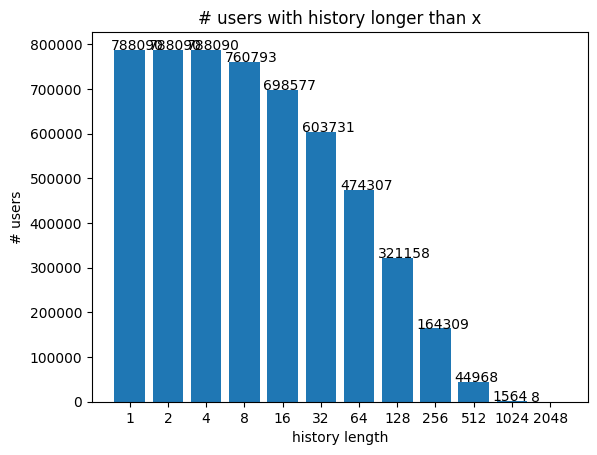

In [17]:
# create histogram of history length
bins = [2 ** i for i in range(13)]
x, _ = np.histogram(history_length["article_id_length"], bins)
x = x[::-1]
x = np.cumsum(x)
bins = bins[::-1]
plt.bar(x=range(len(x)), height=x[::-1])
plt.xticks(range(len(x)), bins[1:][::-1])
for xx, yy in zip(range(len(x)), x[::-1]):
    plt.annotate(str(yy), (xx - 0.5, yy))
plt.title("# users with clicked-history longer than x")
plt.xlabel("history length")
plt.ylabel("# users")

# Amazon KDD 2023

In [2]:
data = pd.read_csv("/Users/qiangzhang/Downloads/sessions_train.csv")
display(data.head(10))

,prev_items,next_item,locale
0,['B09W9FND7K' 'B09JSPLN1M'],B09M7GY217,DE
1,['B076THCGSG' 'B007MO8IME' 'B08MF65MLV' 'B001B...,B001B4THSA,DE
2,['B0B1LGXWDS' 'B00AZYORS2' 'B0B1LGXWDS' 'B00AZ...,B0767DTG2Q,DE
3,['B09XMTWDVT' 'B0B4MZZ8MB' 'B0B7HZ2GWX' 'B09XM...,B0B4R9NN4B,DE
4,['B09Y5CSL3T' 'B09Y5DPTXN' 'B09FKD61R8'],B0BGVBKWGZ,DE
5,['B0749V8TC7' 'B0749W93VC' 'B0749TX4YP'],B0749TX4YS,DE
6,['B09SMK3R8H' 'B01N4ND0F9'],B08YNZT93Z,DE
7,['B09B2W5S9R' 'B09B2YFY6M' 'B09B2WGPRB'],B097CX2V3L,DE
8,['B01MQOR80Q' 'B095HS8R62' 'B09B31WTVY'],B09B32SSDT,DE
9,['3649625660' 'B07N3SNQW5' 'B099JZ9L9Y' 'B07Q2...,B08R7G53T1,DE


In [4]:
# stats on history length
data["article_id_length"] = data["prev_items"].transform(lambda x: len(x))
display(data.head(10))
data_length = data.groupby([data.index.get_level_values(0)]).sum()

,prev_items,next_item,locale,article_id_length
0,['B09W9FND7K' 'B09JSPLN1M'],B09M7GY217,DE,27
1,['B076THCGSG' 'B007MO8IME' 'B08MF65MLV' 'B001B...,B001B4THSA,DE,53
2,['B0B1LGXWDS' 'B00AZYORS2' 'B0B1LGXWDS' 'B00AZ...,B0767DTG2Q,DE,119
3,['B09XMTWDVT' 'B0B4MZZ8MB' 'B0B7HZ2GWX' 'B09XM...,B0B4R9NN4B,DE,93
4,['B09Y5CSL3T' 'B09Y5DPTXN' 'B09FKD61R8'],B0BGVBKWGZ,DE,40
5,['B0749V8TC7' 'B0749W93VC' 'B0749TX4YP'],B0749TX4YS,DE,40
6,['B09SMK3R8H' 'B01N4ND0F9'],B08YNZT93Z,DE,27
7,['B09B2W5S9R' 'B09B2YFY6M' 'B09B2WGPRB'],B097CX2V3L,DE,40
8,['B01MQOR80Q' 'B095HS8R62' 'B09B31WTVY'],B09B32SSDT,DE,40
9,['3649625660' 'B07N3SNQW5' 'B099JZ9L9Y' 'B07Q2...,B08R7G53T1,DE,93


Text(0, 0.5, '# users')

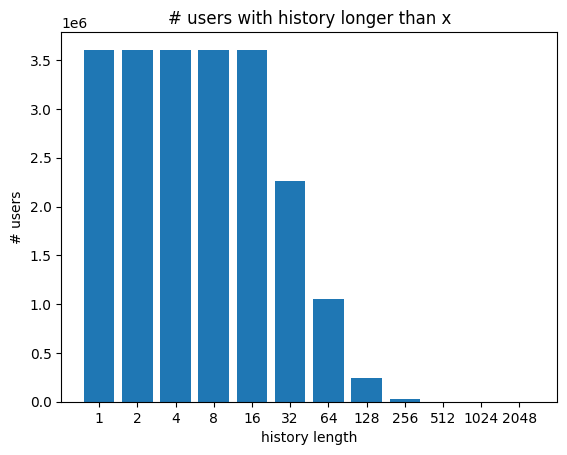

In [14]:
# create histogram of history length
bins = [2 ** i for i in range(13)]
x, _ = np.histogram(data_length["article_id_length"], bins)
x = x[::-1]
x = np.cumsum(x)
bins = bins[::-1]
plt.bar(x=range(len(x)), height=x[::-1])
plt.xticks(range(len(x)), bins[1:][::-1])
plt.title("# users with history longer than x")
plt.xlabel("history length")
plt.ylabel("# users")

In [33]:
interaction = 

448